# Default

In [1]:
# Download the dataset
download.file("https://myslu.stlawu.edu/~ltorrey/ml/Default.csv", "Default.csv")
Default <- read.csv("Default.csv", stringsAsFactors = TRUE)


ERROR: Error in `$<-.data.frame`(`*tmp*`, risk, value = structure(integer(0), levels = character(0), class = "factor")): replacement has 0 rows, data has 10000


In [ ]:
head(Default)

,default,student,balance,income
,<fct>,<fct>,<dbl>,<dbl>
1,No,No,729.5265,44361.625
2,No,Yes,817.1804,12106.135
3,No,No,1073.5492,31767.139
4,No,No,529.2506,35704.494
5,No,No,785.6559,38463.496
6,No,Yes,919.5885,7491.559


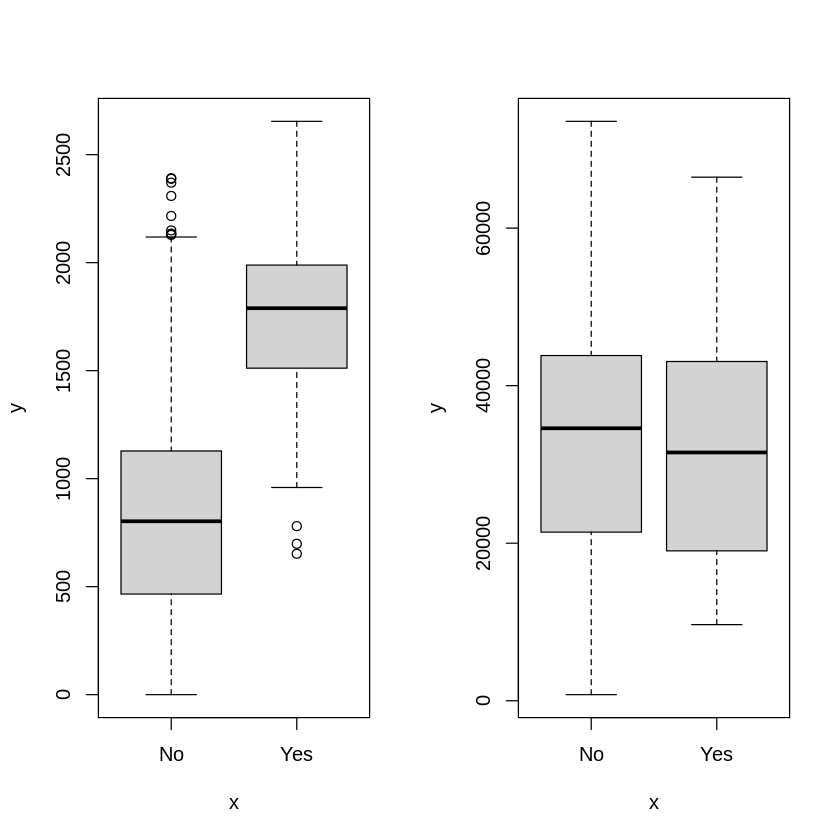

In [ ]:
# Plot some relationships
par(mfrow = c(1,2))
plot(Default$default, Default$balance)
plot(Default$default, Default$income)

In [ ]:
table(Default$default, Default$student)

     
        No  Yes
  No  6850 2817
  Yes  206  127

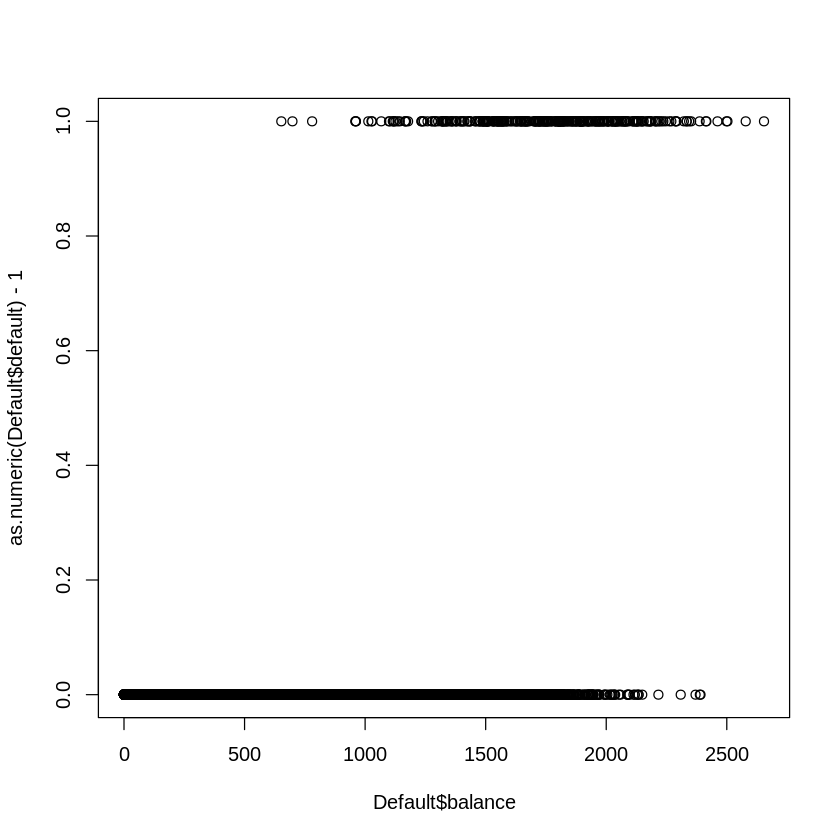

In [ ]:
# making defualt graph with probability range [0,1]
plot(Default$balance, as.numeric(Default$default) - 1)

# Logistic regression

In [ ]:
# Build logistic model
# binomial family makes it logisitic
balance.lm <- glm(default ~ balance, data = Default, family = binomial)

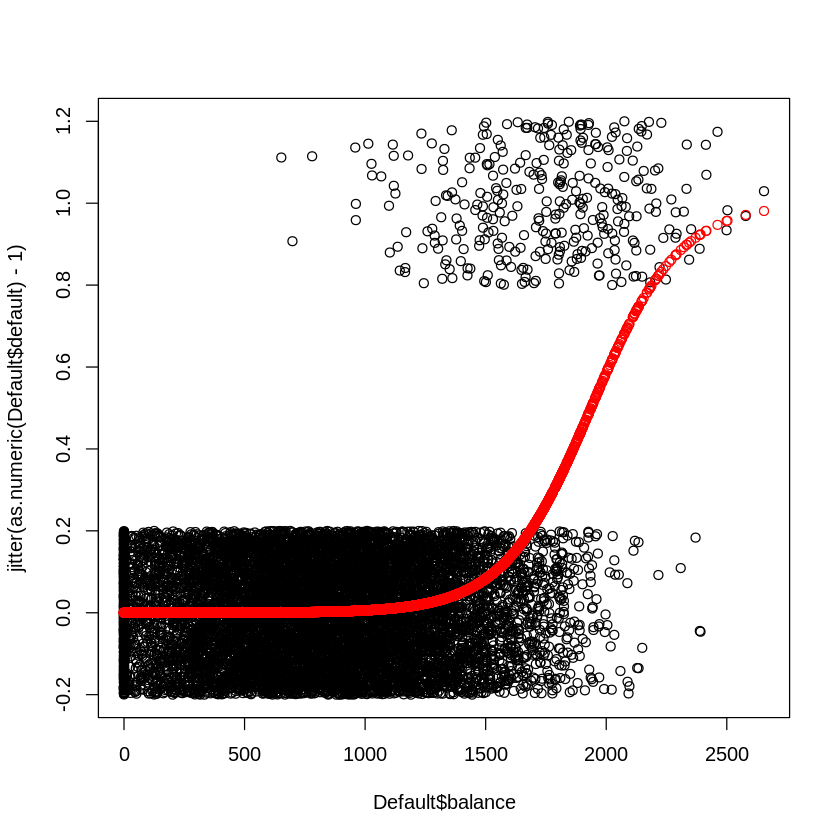

In [ ]:
plot(Default$balance, jitter(as.numeric(Default$default) - 1))
points(Default$balance, predict(balance.lm, type = "response"), col = "red")

In [ ]:
# inspect model with summary
summary(balance.lm)


Call:
glm(formula = default ~ balance, family = binomial, data = Default)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.065e+01  3.612e-01  -29.49   <2e-16 ***
balance      5.499e-03  2.204e-04   24.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1596.5  on 9998  degrees of freedom
AIC: 1600.5

Number of Fisher Scoring iterations: 8


In [ ]:
exp(-1.065e+01 + (5.499e-03 * 2000))/(1+exp(-1.065e+01 + (5.499e-03 * 2000)))

[1] 0.5861325

In [ ]:
# Full logisitic Model
full.lm <- glm(default ~ student + balance + income, data = Default, family = binomial)
summary(full.lm) # lower AIC = better


Call:
glm(formula = default ~ student + balance + income, family = binomial, 
    data = Default)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.087e+01  4.923e-01 -22.080  < 2e-16 ***
studentYes  -6.468e-01  2.363e-01  -2.738  0.00619 ** 
balance      5.737e-03  2.319e-04  24.738  < 2e-16 ***
income       3.033e-06  8.203e-06   0.370  0.71152    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1571.5  on 9996  degrees of freedom
AIC: 1579.5

Number of Fisher Scoring iterations: 8


# Classification errors

In [ ]:
# Train error rate for the balance model
prob <- predict(balance.lm, type = "response")
predictions <- ifelse(prob > 0.5, "Yes", "No")

mean(predictions != Default$default)

[1] 0.0275

In [ ]:
prob <- predict(full.lm, type = "response")
predictions <- ifelse(prob > 0.5, "Yes", "No")

mean(predictions != Default$default)

[1] 0.0268

In [ ]:
# Error rate for the null classifier
predictions <- rep("No", length(Default$default))
mean(predictions != Default$default)


[1] 0.0333

In [ ]:
# Confusion matrix
prob <- predict(full.lm, type = "response")
predictions <- ifelse(prob > 0.5, "Yes", "No")
table(predictions, Default$default)


85/(248+85)

           
predictions   No  Yes
        No  9627  228
        Yes   40  105

[1] 0.2552553